## Univariate Data Analyses- NHANES case study

Demonstrating how to use Python and Pandas to perform  some basic analyses with univariate data using the 2015-2016 wave of the NHANES cross-sectional study to illustrate techniques

import necessary libraries, generally use the %matplotlib inline directive so that any plots that you generate are shown in the notebook

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Next we will load the NHANES data into a Pandas DataFrame

In [2]:
da = pd.read_csv('nhanes_2015_2016.csv')

### Frequency Tables

The value_counts method can be used to determine the number of times that each distinct value of a variable occurs in a data set. In statistical terminology, this is the frequency distribution of the variable

Below we show the frequency distribution of the DMDEDUC2 variable, which is a variable that reflects a person's level of education
The numbers 1,2,3,4,5,9 seen below are codes for the 6 possible non-missing values 

In [3]:
da['DMDEDUC2'].value_counts()

DMDEDUC2
4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: count, dtype: int64

The value_counts excludes missing values, we can confirm this by summing up the distribution fequency above and subtracting from the total number of rows of the dataframe

In [4]:
da.shape[0]-da['DMDEDUC2'].value_counts().sum()

np.int64(261)

Therefore the number of missing values is 261
Lets confirm this by checking how many cells of the dataset is missing 

In [5]:
pd.isnull(da['DMDEDUC2']).sum()

np.int64(261)

In some cases it is good to replace integer codes with a text label that reflects the code meaning
Below we create a new variable 'DMDEDUC2x' that is recorded with text labels

In [8]:
da['DMDEDUC2x'] = da['DMDEDUC2'].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
da['DMDEDUC2x'].value_counts()                                       

DMDEDUC2x
Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: count, dtype: int64

We also want relabeled version of gender variables, so we would make a new variable 'RIAGENDRx'

In [9]:
da['RIAGENDRx'] = da['RIAGENDR'].replace({1:'Male',2:'Female'})

For many purposes, it is more impottant to consider the proportion of each of the possible categories in the sample rather than the number of people
We can do this as follows

In [10]:
x = da['DMDEDUC2x'].value_counts()
x = x/x.sum()
x

DMDEDUC2x
Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: count, dtype: float64

In some cases we may want to treat the missing response category as another category of observed responses, rather than ignoring them
We can do this by assingning 'Missing' to null values using fillna

In [11]:
da['DMDEDUC2x'] = da['DMDEDUC2x'].fillna('Missing')
x = da['DMDEDUC2x'].value_counts()
x = x/x.sum()
x

DMDEDUC2x
Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
Missing            0.045510
Don't know         0.000523
Name: count, dtype: float64

### Numerical Summaries

 A quick way to get a set of numerical summaries for a quantitative variable is with the describe DataFrame method
 Below we demonstrate how to do this using the body weight variable 'BMXWT'. 
 As with many surveys, some data values are missing, so we have to drop the missing values

In [12]:
da['BMXWT'].dropna().describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

Its also possible to calculate individual summary statistics from one column of a data set. This can be done using Pandas or with numpy function

In [13]:
x = da['BMXWT'].dropna() # drop all missing values
print(x.mean()) # Pandas method
print(np.mean(x)) # Numpy method
print(x.median()) 
print(np.percentile(x,50)) # 50th percentile, same as the median
print(np.percentile(x,75)) # 75th percentile
print(x.quantile(0.75)) # Pandas method for quantiles

81.34267560889516
81.34267560889516
78.2
78.2
92.7
92.7


Next we look at frequencies for a systolic blood pressure measurement (BPXSY1). "BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89. Considering only the systolic condition, we can calculate the proportion of the NHANES sample who would be considered to have pre-hypertension.

In [14]:
np.mean((da['BPXSY1']>=120)&(da['BPXSY2']<=139)) # & means and

np.float64(0.3741935483870968)

Next we calculate the proportion of the NHANES subjects who are pre-hypertensive based on diastolic blood pressure

In [15]:
np.mean((da['BPXDI1']>=80)&(da['BPXDI2']<=89))

np.float64(0.14803836094158676)

Finally we calculate the proportion of NHANES subjects who are pre-hypertensive based on either systolic or diastolic blood pressure. Since some people are pre-hypertensive under both criteria, the proportion below is less than the sum of the two proportions calculated above. The combined systolic and diastolic condition for pre-hypertension is somewhat complex, so below we construct temporary variables 'a' and 'b' that hold the systolic and diastolic pre-hypertensive status separately, then combine them with a "logical or" to obtain the final status for each subject.

In [16]:
a = (da['BPXSY1']>=120)&(da['BPXSY2']<=139)
b = (da['BPXDI1']>=80)&(da['BPXDI2']<=89)
print(np.mean(a|b)) # '|' means or

0.43975588491717527


Blood pressure measurements are affected by a phenomenon called "white coat hypertension", in which a subject's bood pressure may be slightly elevated if they are nervous when interacting with health care providers. Typically this effect subsides if the blood pressure is measured several times in sequence. In NHANES, both systolic and diastolic blood pressure are measured three times for each subject (e.g. BPXSY2 is the second measurement of systolic blood pressure). We can calculate the extent to which white coat anxiety is present in the NHANES data by looking a the mean difference between the first two systolic or diastolic blood pressure measurements.

In [17]:
print(np.mean(da['BPXSY1']-da['BPXSY2']))
print(np.mean(da['BPXDI1']-da['BPXDI2']))

0.6749860309182343
0.3490407897187558


These mean differences are positive -- the first systolic blood pressure measurement is around 0.67 mm Hg greater than the second systolic blood pressure measurement, and the first diastolic blood pressure measurement is around 0.35 mm Hg greater than the second diastolic blood pressure measurement. This is consistent with the presence of "white coat hypertension".

### Graphical Summaries

Quantitative variables can be effectively summarized graphically. 
Below we see the distribution of body weight (in Kg), shown as a histogram. The distribution is evidently right-skewed.

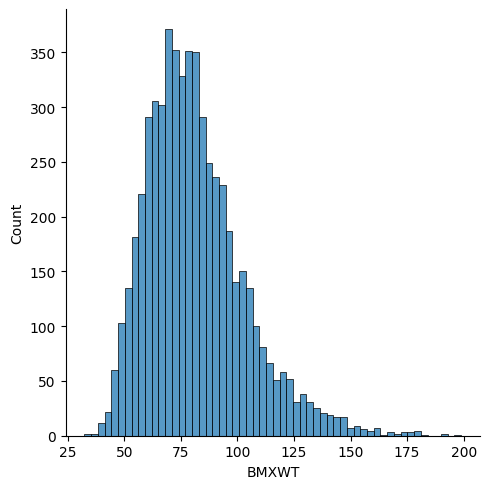

In [18]:
sns.displot(da['BMXWT'].dropna())

Next we look at the histogram of systolic blood pressure measurements. You can see that there is a tendency for the measurements to be rounded to the nearest 5 or 10 units.

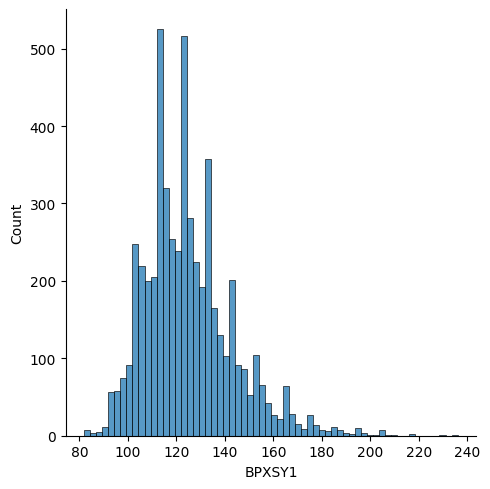

In [19]:
sns.displot(da['BPXSY1'].dropna())

To compare several distributions, we can use side-by-side boxplots. Below we compare the distributions of the first and second systolic blood pressure measurements (BPXSY1, BPXSY2), and the first and second diastolic blood pressure measurements (BPXDI1, BPXDI2). As expected, diastolic measurements are substantially lower than systolic measurements. Above we saw that the second blood pressure reading on a subject tended on average to be slightly lower than the first measurement. This difference was less than 1 mm/Hg, so is not visible in the "marginal" distributions shown below.

Text(0, 0.5, 'Blood pressue in mm/Hg')

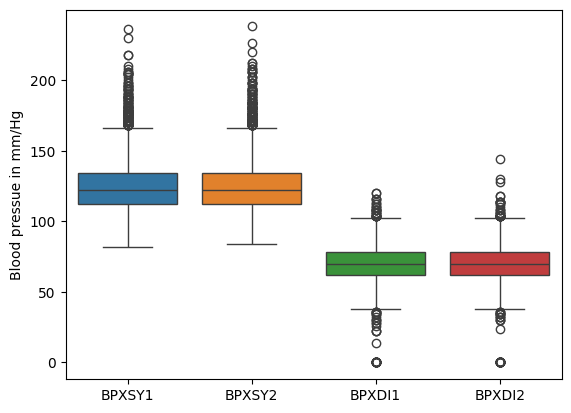

In [20]:
bp = sns.boxplot(da.loc[:,['BPXSY1','BPXSY2','BPXDI1','BPXDI2']])
bp.set_ylabel('Blood pressue in mm/Hg')

### Stratification

One of the most effective ways to get more information out of a dataset is to divide it into smaller, more uniform subsets, and analyze each of these "strata" on its own. We can then formally or informally compare the findings in the different strata. When working with human subjects, it is very common to stratify on demographic factors such as age, sex, and race.


To illustrate this technique, consider blood pressure, which is a value that tends to increase with age. To see this trend in the NHANES data, we can partition the data into age strata, and construct side-by-side boxplots of the systolic blood pressure (SBP) distribution within each stratum. Since age is a quantitative variable, we need to create a series of "bins" of similar SBP values in order to stratify the data. Each box in the figure below is a summary of univariate data within a specific population stratum (here defined by age).

<Axes: xlabel='agegrp', ylabel='BPXSY1'>

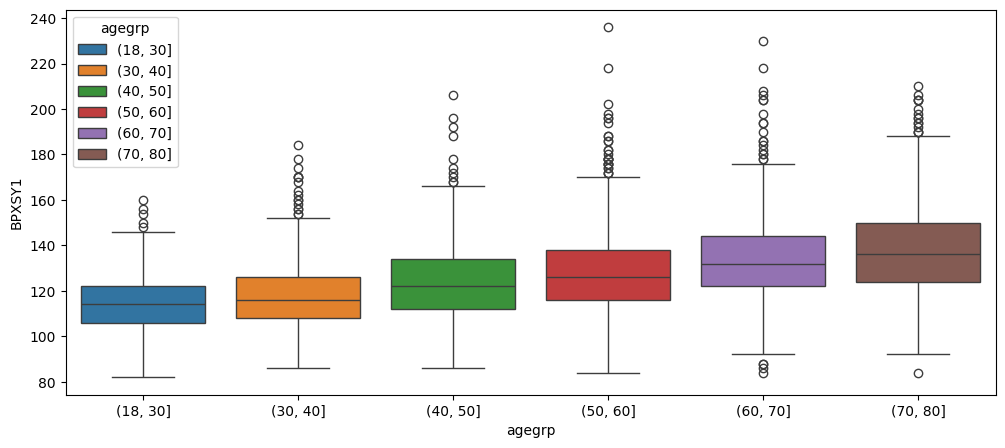

In [21]:
da['agegrp'] = pd.cut(da['RIDAGEYR'],[18,30,40,50,60,70,80]) # Creat age strata
plt.figure(figsize=(12,5)) #make the figure wider than default
sns.boxplot(x = 'agegrp', y = 'BPXSY1',data=da, hue='agegrp')

The plot above clearly shows the tendency of systolic blood pressure to increase with age. Taking this a step further, it is also the case that blood pressure tends to differ between women and men. While we could simply make two side-by-side boxplots to illustrate this contrast, it would be a bit odd to ignore age after already having established that it is strongly associated with blood pressure. Therefore, we will doubly stratify the data by gender and age.

We see from the figure below that within each gender, older people tend to have higher blood pressure than younger people. However within an age band, the relationship between gender and systolic blood pressure is somewhat complex -- in younger people, men have substantially higher blood pressures than women of the same age. However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. It is also notable that the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.

<Axes: xlabel='agegrp', ylabel='BPXSY1'>

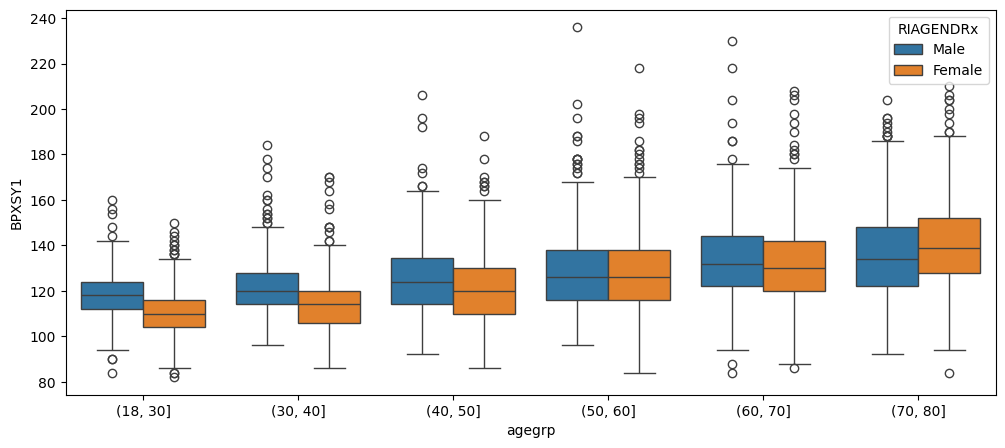

In [22]:
da['agegrp'] = pd.cut(da['RIDAGEYR'],[18,30,40,50,60,70,80]) # Creat age strata
plt.figure(figsize=(12,5)) #make the figure wider than default
sns.boxplot(x = 'agegrp', y = 'BPXSY1',data=da, hue='RIAGENDRx')

When stratifying on two factors (here age and gender), we can group the boxes first by age, and within age bands by gender, as above, or we can do the opposite -- group first by gender, and then within gender group by age bands. Each approach highlights a different aspect of the data.

<Axes: xlabel='RIAGENDRx', ylabel='BPXSY1'>

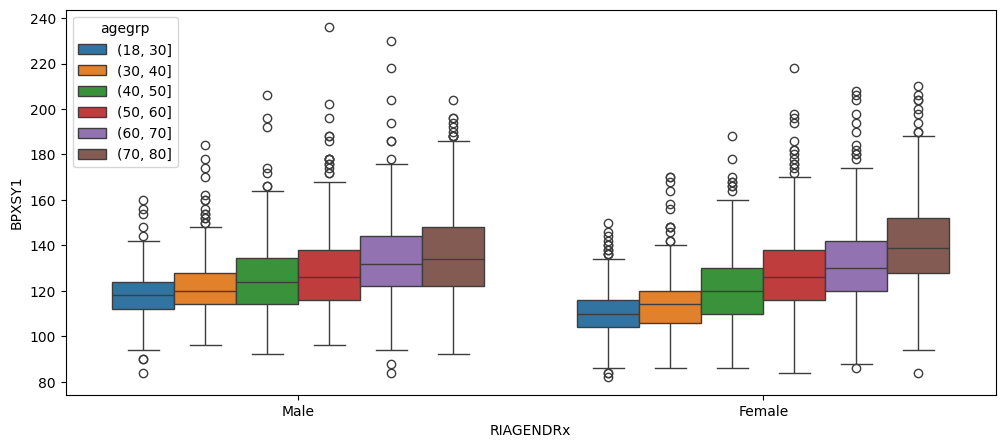

In [23]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=da)

Stratification can also be useful when working with categorical variables. Below we look at the frequency distribution of educational attainment ("DMDEDUC2") within 10-year age bands. While "some college" is the most common response in all age bands, up to around age 60 the second most common response is "college" (i.e. the person graduated from college with a four-year degree). However for people over 50, there are as many or more people with only high school or general equivalency diplomas (HS/GED) than there are college graduates.


**Note on causality and confounding**: An important role of statistics is to aid researchers in identifying causes underlying observed differences. Here we have seen differences in both blood pressure and educational attainment based on age. It is plausible that aging directly causes blood pressure to increase. But in the case of educational attainment, this is actually a "birth cohort effect". NHANES is a cross sectional survey (all data for one wave were collected at a single point in time). People who were, say, 65 in 2015 (when these data were collected), were college-aged around 1970, while people who were in their 20's in 2015 were college-aged in around 2010 or later. Over the last few decades, it has become much more common for people to at least begin a college degree than it was in the past. Therefore, younger people as a group have higher educational attainment than older people as a group. As these young people grow older, the cross sectional relationship between age and educational attainment will change.

In [24]:
da.groupby('agegrp',observed = False)['DMDEDUC2x'].value_counts()

agegrp    DMDEDUC2x      
(18, 30]  Some college/AA    364
          College            278
          HS/GED             237
          Missing            128
          9-11                99
          <9                  47
          Don't know           0
(30, 40]  Some college/AA    282
          College            264
          HS/GED             182
          9-11               111
          <9                  93
          Don't know           0
          Missing              0
(40, 50]  Some college/AA    262
          College            260
          HS/GED             171
          9-11               112
          <9                  98
          Don't know           0
          Missing              0
(50, 60]  Some college/AA    258
          College            220
          HS/GED             220
          9-11               122
          <9                 104
          Don't know           0
          Missing              0
(60, 70]  Some college/AA    238
          HS/GED 

We can also stratify jointly by age and gender to explore how educational attainment varies by both of these factors simultaneously. In doing this, it is easier to interpret the results if we pivot the education levels into the columns, and normalize the counts so that they sum to 1. After doing this, the results can be interpreted as proportions or probabilities. One notable observation from this table is that for people up to age around 60, women are more likely to have graduated from college than men, but for people over aged 60, this relationship reverses.

In [25]:
dx = da.loc[~da['DMDEDUC2x'].isin(["Don't know","Missing"]),:]
dx = dx.groupby(['agegrp','RIAGENDRx'], observed=False)['DMDEDUC2x']
dx = dx.value_counts()
dx = dx.unstack() # Restructure the results from 'long' to 'wide'
dx = dx.apply(lambda x: x/x.sum(),axis=1) # Normalize to get proportions
print(dx.to_string(float_format='%.3f')) # set to 3 decimal places

DMDEDUC2x           9-11    <9  College  HS/GED  Some college/AA
agegrp   RIAGENDRx                                              
(18, 30] Female    0.080 0.049    0.282   0.215            0.374
         Male      0.117 0.042    0.258   0.250            0.333
(30, 40] Female    0.089 0.097    0.314   0.165            0.335
         Male      0.151 0.103    0.251   0.227            0.269
(40, 50] Female    0.110 0.106    0.299   0.173            0.313
         Male      0.142 0.112    0.274   0.209            0.262
(50, 60] Female    0.117 0.102    0.245   0.234            0.302
         Male      0.148 0.123    0.231   0.242            0.256
(60, 70] Female    0.118 0.188    0.195   0.206            0.293
         Male      0.135 0.151    0.233   0.231            0.249
(70, 80] Female    0.105 0.225    0.149   0.240            0.281
         Male      0.113 0.180    0.237   0.215            0.255
